# Semana 6 - Visualización

**Nombre :** Ernesto Nicanor Santillán Guerrero 

**Matricula :** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 31 de Octubre de 2022

# 1
* Descarga los datos y carga el dataset en tu libreta.

In [194]:
# Librería de manejo de bases
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=25
%matplotlib inline

# Librería de pre procesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Librería de PCA
from sklearn.decomposition import PCA


In [195]:
# Datos desde github
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(url)

# 2
* Obten la información del DataFrame con los métodos y propiedades: shape, columns, ##head(), dtypes, info(), isna()

# Descripción de las variables del  conjunto de datos

Dataset information
Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [196]:
# shape
df.shape

(30000, 25)

In [197]:
# Revisa el número de columnas y filas
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.") 

Hay 30000 filas y 25 columnas.


In [198]:
# columnas
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [199]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [200]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [202]:
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Comentarios:

-> El dataframe consta de 25 variables de las cuales una es la variable de respuesta, 23 son variables explicativa y una es el ID de cada cliente.

-> La variable ID no nos da ninguna información.

-> Hay algunas columnas con datos faltantes.

-> Todas las variables son numéricas.

-> Las variables X2 a X4, X6 a X11, e Y deberían ser categóricas
* En resumen 25 variables. De acuerdo a los dtypes 23 son de punto flotante y 2 enteras. Pero observando la descripción del conjunto de datos, varias de estas variables son categóricas.

# 3
* limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [203]:
for n in df.columns:
  df[n].fillna(df[n].median(), inplace=True)

In [204]:
df.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

# 4
* Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [205]:
# Muestra un resumen estadístico de todas las variables
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,30000.0,1.603767,0.489122,1.0,1.00,2.0,2.00,2.0
X3,30000.0,1.853067,0.790294,0.0,1.00,2.0,2.00,6.0
X4,30000.0,1.551933,0.521963,0.0,1.00,2.0,2.00,3.0
X5,30000.0,35.483967,9.217276,21.0,28.00,34.0,41.00,79.0
X6,30000.0,-0.016633,1.123773,-2.0,-1.00,0.0,0.00,8.0
X7,30000.0,-0.133667,1.197155,-2.0,-1.00,0.0,0.00,8.0
X8,30000.0,-0.166367,1.195911,-2.0,-1.00,0.0,0.00,8.0
X9,30000.0,-0.220733,1.168983,-2.0,-1.00,0.0,0.00,8.0


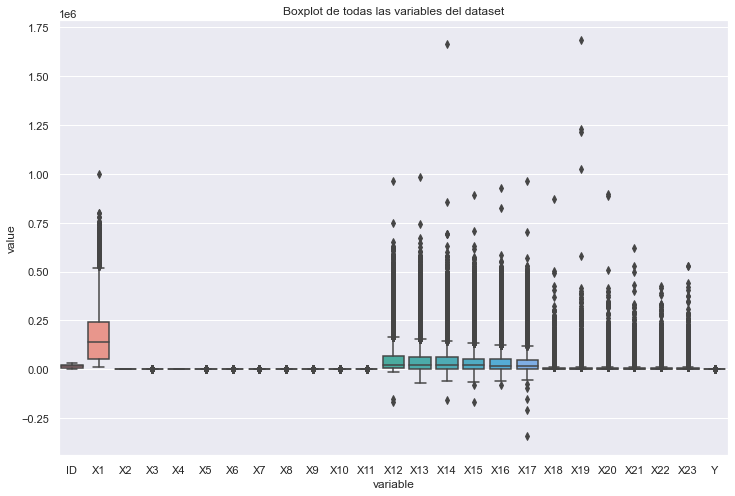

In [206]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='variable', y='value', data=pd.melt(df));
plt.title("Boxplot de todas las variables del dataset");

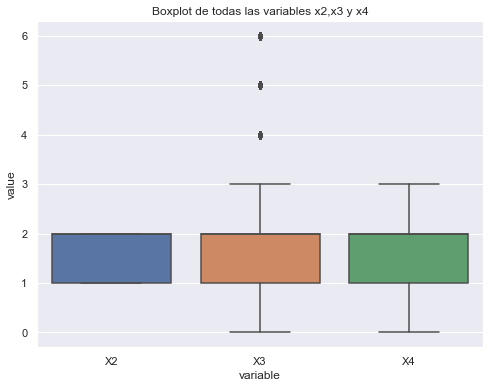

In [207]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='variable', y='value', data=pd.melt(df[['X2','X3','X4']]));
plt.title("Boxplot de todas las variables x2,x3 y x4");

* Estas 3 variables son categóricas. 
X2= Gender ((1 = male; 2 = female), X3 = Education ((1 = graduate school; 2 = university; 3 = high school; 4 = others) y X4= Marital Status ((1 = married; 2 = single; 3 = others). La variable X3 tiene datos que no son compatibles con la descripción dada (Valores >4)


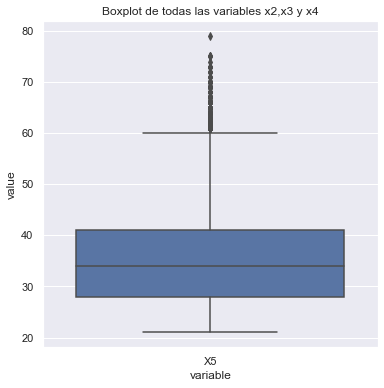

In [208]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(x='variable', y='value', data=pd.melt(df[['X5']]));
plt.title("Boxplot de todas las variables x2,x3 y x4");

* X5 es una variable  numérica y representa la edad del cliente.

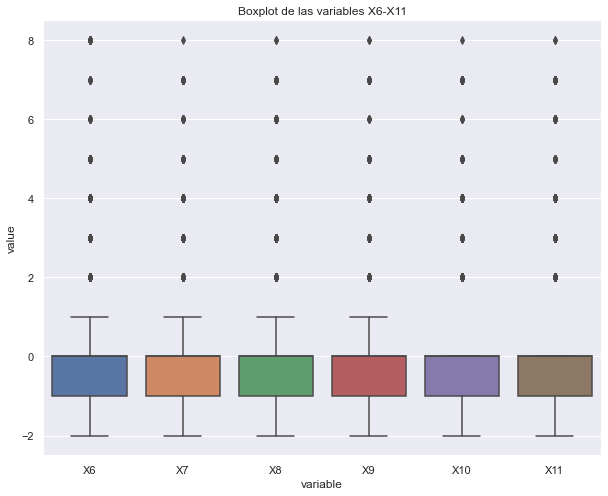

In [209]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='variable', y='value', data=pd.melt(df[['X6','X7','X8','X9','X10','X11']]));
plt.title("Boxplot de las variables X6-X11");

* Estas variables definen el status del pago del mes (pago a tiempo, tarde). Tambien se observan valores que
* no cumplen con la descripción de las variables (-2 y 0 principalmente)
* History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

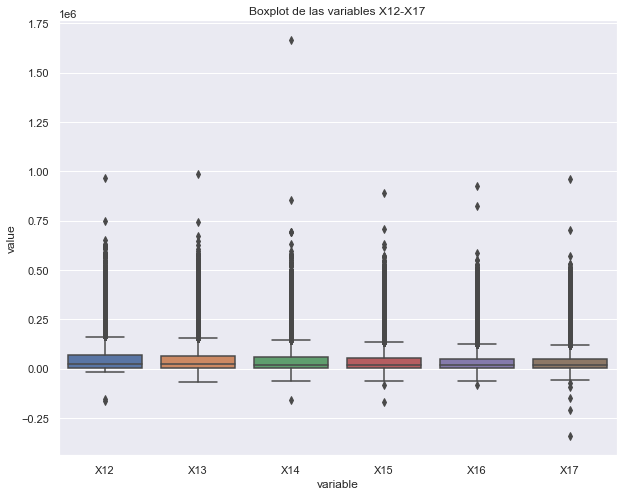

In [210]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='variable', y='value', data=pd.melt(df[['X12','X13','X14','X15','X16','X17']]));
plt.title("Boxplot de las variables X12-X17");

* Estas variables son cantidad a pagar (saldo pendiente) en meses anteriores
* Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

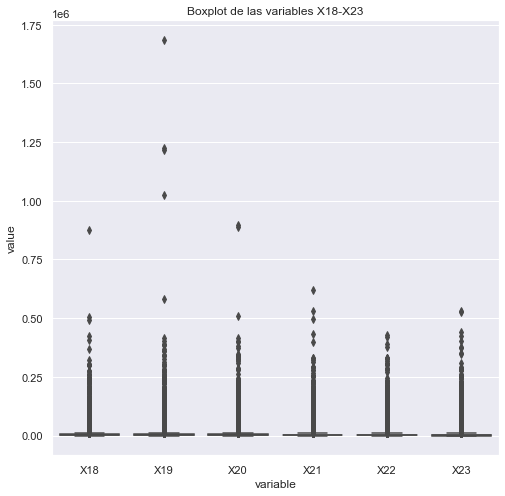

In [211]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(x='variable', y='value', data=pd.melt(df[['X18','X19','X20','X21','X22','X23']]));
plt.title("Boxplot de las variables X18-X23");

* Estas variables son cantidad pagada en meses anteriores
* Se observa outliers en X19
* (Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.)

# 5
* Realiza el conteo de las variables categóricas

** Estas son las variables categóricas

In [212]:
# Crea una lista de variables categóricas
# En total son 11
cat=['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
id_=['ID']

# 6
* Escala los datos, si consideras necesario

In [213]:
#guardamos variable_respuesta
var_resp=df['Y']

In [214]:
# Dejamos unicamente las variables no categórias
df=df.loc[:, ~df.columns.isin(cat+id_)]

In [215]:
# Muestra las primeras 5 filas de la base
df.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


### Análisis Exploratorio de Datos

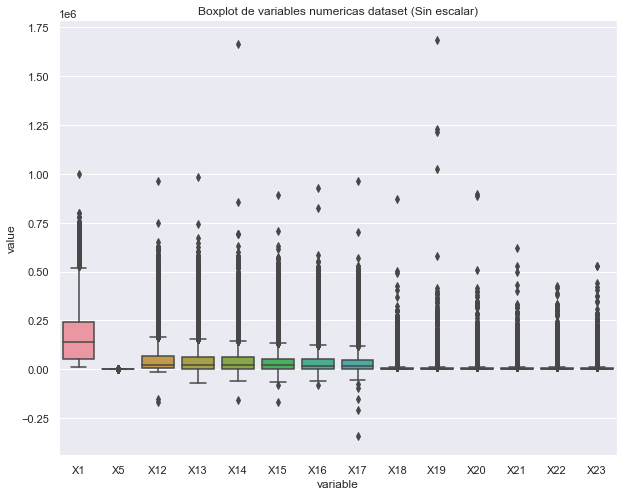

In [216]:
# Boxplot de los datos originales
sns.set(rc={'figure.figsize':(10,8)});
sns.boxplot(x='variable', y='value', data=pd.melt(df));
plt.title("Boxplot de variables numericas dataset (Sin escalar)");

###  Procedemos a normalizar usando MinMax  

In [217]:
# Normalización de los datos utilizando la normalización mix-max
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(df)
scaled_minmax[:2]

array([[0.01010101, 0.05172414, 0.14998173, 0.06916432, 0.08672289,
        0.16013776, 0.08064809, 0.26097872, 0.        , 0.00040908,
        0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.0862069 , 0.14889243, 0.06785751, 0.08781713,
        0.16321994, 0.08407395, 0.26348474, 0.        , 0.00059373,
        0.00111602, 0.00161031, 0.        , 0.00378311]])

In [218]:
# Copia de bd con los datos normalizados con min-max
scaled_df_minmax = pd.DataFrame(scaled_minmax, columns=df.columns)

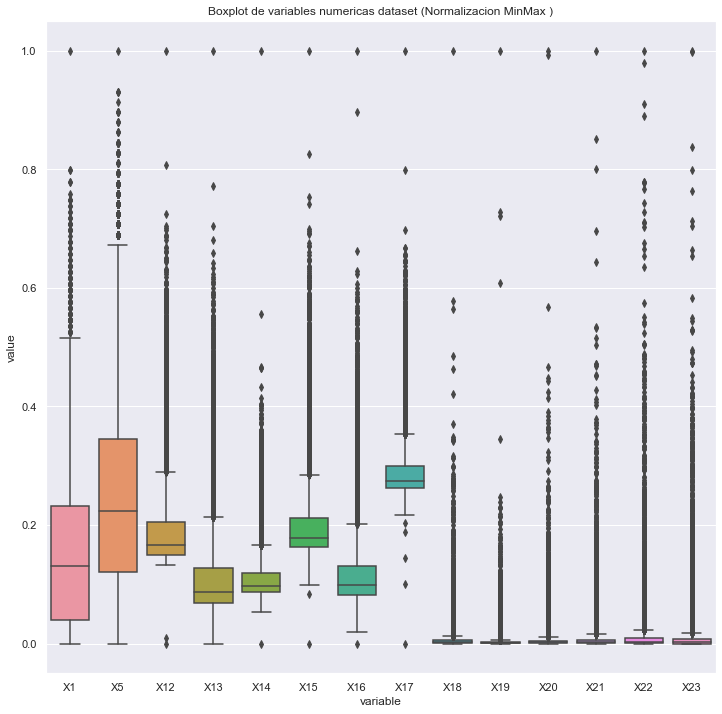

In [219]:
# Boxplot de datos normalizados con min-max
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot(x='variable', y='value', data=pd.melt(scaled_df_minmax));
plt.title("Boxplot de variables numericas dataset (Normalizacion MinMax )");

## Se observa una reducción de los valores outliers.


# 7
* Reduce las dimensiones con PCA, si consideras necesario.

## PCA (datos con minmax scaler)

In [220]:
# Creación de componentes PCA con datos min-max
pca_minmax = PCA()
pca_minmax.fit_transform(scaled_df_minmax)

array([[-2.62106016e-01, -2.71309899e-02,  2.81243812e-02, ...,
         3.96234115e-04,  3.45169428e-04,  6.17014902e-04],
       [-1.88345137e-01,  6.45803056e-03, -4.12649023e-02, ...,
         7.40883083e-04, -2.79490567e-04, -9.06301604e-05],
       [-7.67098382e-02, -6.46185185e-02,  1.66235993e-02, ...,
        -5.17039340e-03, -1.22217481e-03, -4.17959106e-04],
       ...,
       [-6.39615136e-02, -1.30048887e-01,  5.98110681e-02, ...,
         4.13109961e-03,  9.03072940e-04, -1.46978725e-03],
       [ 4.14173466e-02, -9.53482246e-02,  6.87747710e-02, ...,
        -1.28232753e-02, -7.89310240e-03, -9.93359044e-03],
       [ 9.21884933e-02, -1.69902475e-01,  1.00099798e-01, ...,
        -9.41236013e-05,  7.38905947e-03, -1.93918862e-03]])

In [221]:
# Resumen de varianza de los componentes principales
pcsSummary_df_minmax = pd.DataFrame({'Desviación': np.sqrt(pca_minmax.explained_variance_),
                             '% de la varianza explicada': pca_minmax.explained_variance_ratio_*100,
                             '% Varianza acumulada': np.cumsum(pca_minmax.explained_variance_ratio_*100)
                             })

pcsSummary_df_minmax = pcsSummary_df_minmax.transpose()
pcsSummary_df_minmax.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df_minmax.columns) + 1)]
pcsSummary_df_minmax.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación,0.1654,0.1453,0.1099,0.0368,0.0337,0.0319,0.0248,0.0210,0.0188,0.0156,0.0120,0.0104,0.0086,0.0062
% de la varianza explicada,41.4252,31.9465,18.2653,2.0481,1.7199,1.5434,0.9307,0.6669,0.5325,0.3688,0.2178,0.1648,0.1125,0.0576
% Varianza acumulada,41.4252,73.3717,91.6370,93.6852,95.4051,96.9485,97.8792,98.5461,99.0785,99.4473,99.6651,99.8299,99.9424,100.0000


# Observaciones
* Los primeros 2 componentes explican mas del 70 % de la variación. 



In [222]:
# Composición de los componentes principales
pcsminmaxComponents_df = pd.DataFrame(pca_minmax.components_.transpose(), 
                                columns=pcsSummary_df_minmax.columns,
                                index=scaled_df_minmax.iloc[:,0:].columns
                                )
pcsminmaxComponents_df.iloc[:,:2]

,PC1,PC2
X1,0.437234,0.500816
X5,0.824708,-0.554503
X12,0.164544,0.302391
X13,0.171193,0.318066
X14,0.096055,0.178208
X15,0.154545,0.288691
X16,0.152013,0.284822
X17,0.112540,0.210894
X18,0.018288,0.028957
X19,0.010888,0.016698


In [223]:
# Principales variables que componen los primeros 3 componentes principales
[(item,pcsminmaxComponents_df.sort_values(by=item, key=abs, ascending=False)[item][0:5]) for item in ['PC1','PC2']]

[('PC1',
  X5     0.824708
  X1     0.437234
  X13    0.171193
  X12    0.164544
  X15    0.154545
  Name: PC1, dtype: float64),
 ('PC2',
  X5    -0.554503
  X1     0.500816
  X13    0.318066
  X12    0.302391
  X15    0.288691
  Name: PC2, dtype: float64)]

# Observaciones

* Como se menciono en la sección anterior, esta tabla es un resumen de la tabla anterior. En ella podemos observar las variables originales que conforman los primeros 2 componentes.

* Por ejemplo, PC1 y PC2 estan compuestos principalmente de la variables X5, X1, X13, X12 y X15.  
* Esto nos dice que las variables que más contribuyen y explican la variación (y por tanto los 2 componente principales) son edad, monto de credito y monto a pagar en los primero dos meses.

# 8
* Elabora los histogramas de los atributos para visualizar su distribución

In [224]:
column_name_dict={"X5":"Age","X1":"Credit Amount","X13":"bill amount statement Aug","X12":"bill amount statement Sept"}

In [225]:
column_name_dict

{'X5': 'Age',
 'X1': 'Credit Amount',
 'X13': 'bill amount statement Aug',
 'X12': 'bill amount statement Sept'}

In [226]:
scaled_df_minmax.rename(columns=column_name_dict,inplace=True)

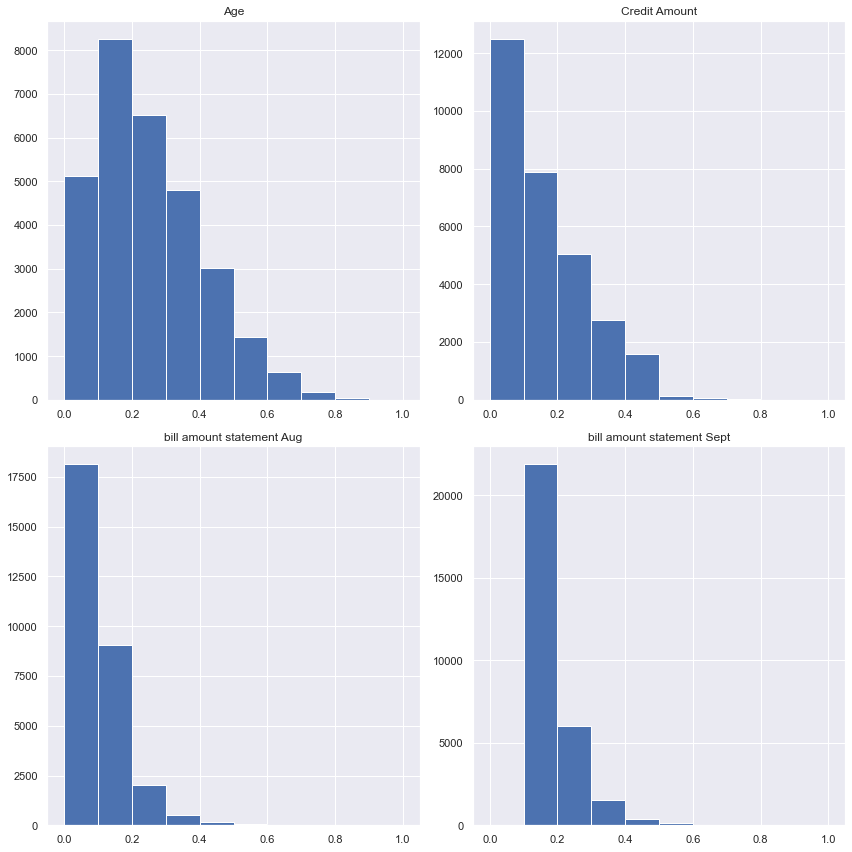

In [227]:
scaled_df_minmax[["Age","Credit Amount","bill amount statement Aug","bill amount statement Sept"]].hist(bins=10);
plt.tight_layout();

# 9
* Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.


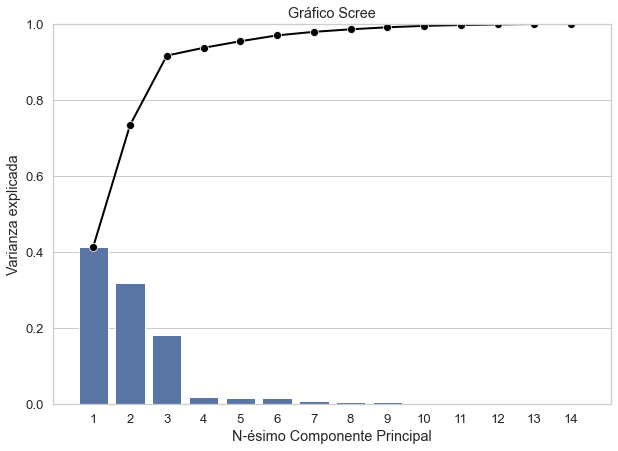

In [228]:
PC_components = np.arange(pca_minmax.n_components_) + 1
#PC_components

# Gráfico Scree
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca_minmax.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca_minmax.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Gráfico Scree')
plt.xlabel('N-ésimo Componente Principal')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

# Observaciones grafica de screed

* En la gráfica Scree notamos claramente el "codo" en el componente 3, lo cual concuerda con el número de componente que habíamos seleccionado.
* Usar minmaxscaler al parecer ayuda a mejorar la captura de mayor variación en menos componentes. 
* Tambien las variables que contribuyen a estos componentes son mas congruentes tal como edad, monto credito y monto a pagar en los primeros 2 meses.


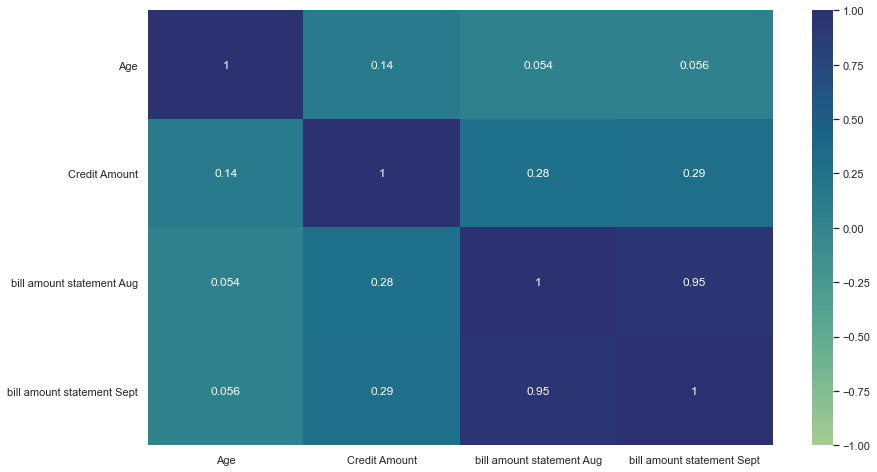

In [229]:
# Crea gráfico de correleción con codigo de colores
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(scaled_df_minmax[["Age","Credit Amount","bill amount statement Aug","bill amount statement Sept"]].corr(), vmin = -1, vmax = 1, cmap = "crest", annot= True);

## En este grafico observamos las correlaciones entre estas variables, las cuales fueron las que mas contribuyeron a conformar los 2 principales componentes de este conjunto de datos


In [230]:
scaled_df_minmax['Y']=var_resp.values

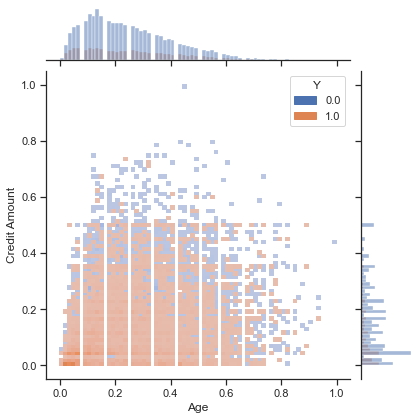

In [236]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=scaled_df_minmax,
    x="Age", y="Credit Amount", hue="Y",
    kind="hist",
)

# Observaciones
* En esta grafica observamos la distribución de las variables edad y Monto de credito. Color Azul indica que cumplio pago